## Dental image CNN classification

- cats&dogs script를 참고하고 CNN은 keras로 간편하게 구축했지만, 자력으로 처음부터 끝까지 코딩짜서 완성하고 성공시킴!

- 200개가 안되는 training set으로 CNN 학습 결과, test set accuracy 71%가 나옴.

- 근데 강사님 피드백: resnet 쓰면 99%도 나옴 (코드도 간단)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from random import shuffle
from tqdm import tqdm
import glob
from PIL import Image

tf.enable_eager_execution()
print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [4]:
TRAIN_DIR = './train/'
TEST_DIR = './test/'

IM_WIDTH = 50
IM_HEIGHT = 50

- cured   = 0
- decay   = 1
- healthy = 2

In [14]:
for i in ['cured/', 'decayed/', 'healthy/']:
    print(TRAIN_DIR + i)

./train/cured/
./train/decayed/
./train/healthy/


In [19]:
def read_images(directory, resize_to=(50,50)):
    images = []
    labels = []
    
    for i in ['cured/', 'decayed/', 'healthy/']:
        
    
        for f in tqdm(os.listdir(directory + i)):         #tqdm: progress bar 표시

            #디렉토리 이름과 파일 이름을 연결.
            #directory: ./cats_dogs/train/
            #f: cat.0.jpg
            #path: ./cats_dogs/train/cat.0.jpg
            path = os.path.join(directory + i, f)

            im = Image.open(path)
            im = im.resize(resize_to)

            im = np.array(im) / 255.0   # 이미지 파일에 저장된 RGB 값은 0~255 사이로 저장되어 있음.ㅁ
            im = im.astype('float32')

            images.append(im)  # images에 im 추가

            label = 0 if 'cured' in path else 1 if 'decayed' in path else 2
            labels.append(label)

    #label을 one hot encoding 처리
    num = np.unique(labels, axis=0)
    num = num.shape[0]
    labels = np.eye(num)[labels]

    return np.array(images), np.array(labels)

In [20]:
X_train, y_train = read_images(directory = TRAIN_DIR, resize_to=(IM_WIDTH, IM_HEIGHT))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 90.32it/s]


In [21]:
X_train

array([[[[0.85490197, 0.4745098 , 0.4117647 ],
         [0.8352941 , 0.5058824 , 0.40392157],
         [0.8627451 , 0.49411765, 0.39215687],
         ...,
         [0.8862745 , 0.6901961 , 0.48235294],
         [0.8862745 , 0.6666667 , 0.42745098],
         [0.88235295, 0.62352943, 0.33333334]],

        [[0.85882354, 0.47843137, 0.41568628],
         [0.8509804 , 0.5058824 , 0.4117647 ],
         [0.87058824, 0.5137255 , 0.40784314],
         ...,
         [0.88235295, 0.6862745 , 0.45490196],
         [0.8901961 , 0.654902  , 0.41960785],
         [0.87058824, 0.6039216 , 0.31764707]],

        [[0.8666667 , 0.49803922, 0.4       ],
         [0.8784314 , 0.5176471 , 0.41960785],
         [0.87058824, 0.5294118 , 0.41960785],
         ...,
         [0.8745098 , 0.65882355, 0.40784314],
         [0.88235295, 0.6313726 , 0.3529412 ],
         [0.8509804 , 0.5686275 , 0.24705882]],

        ...,

        [[0.99607843, 0.5529412 , 0.41960785],
         [0.99215686, 0.5686275 , 0.41568628]

In [23]:
a = X_train[0]
a

array([[[0.85490197, 0.4745098 , 0.4117647 ],
        [0.8352941 , 0.5058824 , 0.40392157],
        [0.8627451 , 0.49411765, 0.39215687],
        ...,
        [0.8862745 , 0.6901961 , 0.48235294],
        [0.8862745 , 0.6666667 , 0.42745098],
        [0.88235295, 0.62352943, 0.33333334]],

       [[0.85882354, 0.47843137, 0.41568628],
        [0.8509804 , 0.5058824 , 0.4117647 ],
        [0.87058824, 0.5137255 , 0.40784314],
        ...,
        [0.88235295, 0.6862745 , 0.45490196],
        [0.8901961 , 0.654902  , 0.41960785],
        [0.87058824, 0.6039216 , 0.31764707]],

       [[0.8666667 , 0.49803922, 0.4       ],
        [0.8784314 , 0.5176471 , 0.41960785],
        [0.87058824, 0.5294118 , 0.41960785],
        ...,
        [0.8745098 , 0.65882355, 0.40784314],
        [0.88235295, 0.6313726 , 0.3529412 ],
        [0.8509804 , 0.5686275 , 0.24705882]],

       ...,

       [[0.99607843, 0.5529412 , 0.41960785],
        [0.99215686, 0.5686275 , 0.41568628],
        [0.99215686, 0

(50, 50, 3)


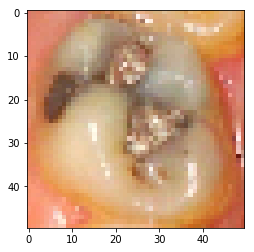

In [36]:
print(a.shape)
plt.imshow(a)
plt.show()

In [32]:
y_train[0]

array([1., 0., 0.])

In [38]:
X_train[100]

array([[[0.28627452, 0.04705882, 0.03529412],
        [0.30588236, 0.05490196, 0.05490196],
        [0.28627452, 0.04705882, 0.03529412],
        ...,
        [0.58431375, 0.19215687, 0.12941177],
        [0.5921569 , 0.20784314, 0.10196079],
        [0.6       , 0.27058825, 0.12941177]],

       [[0.27450982, 0.03529412, 0.03137255],
        [0.30588236, 0.05490196, 0.05490196],
        [0.30588236, 0.05098039, 0.04313726],
        ...,
        [0.6       , 0.22745098, 0.15686275],
        [0.5921569 , 0.20392157, 0.12941177],
        [0.5647059 , 0.1882353 , 0.09019608]],

       [[0.30588236, 0.05490196, 0.04705882],
        [0.3137255 , 0.05882353, 0.03529412],
        [0.3254902 , 0.07058824, 0.0627451 ],
        ...,
        [0.6117647 , 0.21568628, 0.1764706 ],
        [0.5921569 , 0.21176471, 0.14509805],
        [0.5686275 , 0.1764706 , 0.08627451]],

       ...,

       [[0.54509807, 0.19215687, 0.15686275],
        [0.56078434, 0.1764706 , 0.1254902 ],
        [0.5647059 , 0

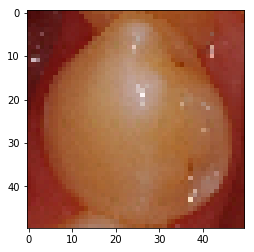

In [39]:
plt.imshow(X_train[100])
plt.show()

In [40]:
y_train[100]

array([0., 0., 1.])

In [41]:
X_train.shape

(150, 50, 50, 3)

In [42]:
y_train.shape

(150, 3)

In [49]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=5, activation=tf.nn.relu, padding='SAME',
                                  input_shape=(50, 50, 3)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=32, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.8))
    model.add(keras.layers.Dense(3))
    return model

In [50]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 32)        2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       204928    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          204864    
__________

In [51]:
optimizer = tf.train.AdamOptimizer(0.001)

In [54]:
for step in range(30):

    with tf.GradientTape() as tape:
        hypothesis = model(X_train, training=True)
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis,
                                                                         labels=y_train))
        grads = tape.gradient(cost, model.variables)

    optimizer.apply_gradients(zip(grads, model.variables))
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y_train, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    print('step: {} Loss: {:.4f} accuracy: {:.4f}'.format(step, cost, accuracy))

step: 0 Loss: 1.0126 accuracy: 0.4800
step: 1 Loss: 1.0015 accuracy: 0.4733
step: 2 Loss: 0.9441 accuracy: 0.5733
step: 3 Loss: 0.8640 accuracy: 0.6267
step: 4 Loss: 1.0035 accuracy: 0.4867
step: 5 Loss: 0.8697 accuracy: 0.6067
step: 6 Loss: 0.8465 accuracy: 0.6600
step: 7 Loss: 0.8842 accuracy: 0.5733
step: 8 Loss: 0.8514 accuracy: 0.5867
step: 9 Loss: 0.7789 accuracy: 0.6933
step: 10 Loss: 0.7720 accuracy: 0.6733
step: 11 Loss: 0.8305 accuracy: 0.6467
step: 12 Loss: 0.6813 accuracy: 0.6867
step: 13 Loss: 0.7217 accuracy: 0.6800
step: 14 Loss: 0.7352 accuracy: 0.6867
step: 15 Loss: 0.6380 accuracy: 0.7067
step: 16 Loss: 0.7018 accuracy: 0.7067
step: 17 Loss: 0.6388 accuracy: 0.7333
step: 18 Loss: 0.6272 accuracy: 0.7400
step: 19 Loss: 0.6047 accuracy: 0.7400
step: 20 Loss: 0.5585 accuracy: 0.7733
step: 21 Loss: 0.5270 accuracy: 0.7733
step: 22 Loss: 0.5808 accuracy: 0.7733
step: 23 Loss: 0.5178 accuracy: 0.7733
step: 24 Loss: 0.5694 accuracy: 0.7267
step: 25 Loss: 0.6041 accuracy: 0.7

In [55]:
X_test, y_test = read_images(directory = TEST_DIR, resize_to=(IM_WIDTH, IM_HEIGHT))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 74.31it/s]


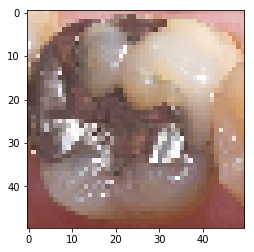

In [56]:
plt.imshow(X_test[0])
plt.show()

In [57]:
y_test[0]

array([1., 0., 0.])

In [58]:
predict = model(X_test, training=False)
predict # 이미지가 0~1 각각에 해당하는 확률이 저장되어 있음

<tf.Tensor: id=12668, shape=(60, 3), dtype=float32, numpy=
array([[ 1.1097419e+00,  7.0066255e-01, -2.2875719e+00],
       [-5.8639061e-01,  1.4027593e-01,  4.5302114e-01],
       [-4.0310916e-01, -3.3163434e-01,  6.9814026e-01],
       [-8.8674057e-01,  1.1867419e+00, -4.8006603e-01],
       [ 8.7835945e-02, -8.8141787e-01,  8.3817947e-01],
       [-2.0756638e+00,  2.0608850e+00,  1.2799226e-02],
       [ 2.1542460e-01, -9.7272980e-01,  7.5306678e-01],
       [-1.2855593e+00,  2.9268935e+00, -1.8750719e+00],
       [-4.0957648e-01,  1.8057287e-01,  2.1584320e-01],
       [ 3.3960053e-01, -1.2867570e+00,  9.1700935e-01],
       [ 5.0974554e-01,  7.2307396e-01, -1.5743226e+00],
       [ 1.3077425e+00, -1.7108324e+00,  2.7964038e-01],
       [ 4.6205705e-01, -1.1806021e+00,  6.8062413e-01],
       [ 2.8729801e+00, -4.4679064e-01, -2.9755232e+00],
       [ 2.9557678e-01, -1.0977665e+00,  8.1506485e-01],
       [ 4.8129630e+00, -2.7315097e+00, -2.5837126e+00],
       [ 5.8669586e+00, -4.56

In [59]:
predict=tf.argmax(predict, 1)  # 가장 확률 높은 col의 index를 predict에 저장
predict

<tf.Tensor: id=12671, shape=(60,), dtype=int64, numpy=
array([0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2], dtype=int64)>

In [68]:
onehot_predict = np.eye(3)[predict]
onehot_predict

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [84]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, mean_squared_error

print('accuracy', accuracy_score(y_test, onehot_predict))
print('r2_score', r2_score(y_test, onehot_predict))

accuracy 0.7166666666666667
r2_score 0.1499999999999996


In [81]:
y_true = tf.argmax(y_test,1)
y_true

<tf.Tensor: id=12998, shape=(60,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)>

In [82]:
confusion_matrix(y_true, predict)

array([[ 7,  5,  8],
       [ 0, 17,  3],
       [ 1,  0, 19]], dtype=int64)

In [85]:
mean_squared_error(y_true, predict)

0.7333333333333333